# 06MIOT - Sistemas y tecnologías para la gestión de la información

**Actividad 1. Tratamiento de datos -- Cristian Monroy Martinez & Urko Gutierrez Albizu --**

En esta primera actividad comenzamos a trabajar con los **Notebooks** de **JupyterLab**. El objetivo es realizar tratamiento de datos mediante **codigo Python**. En nuestro caso, los datos están almacenados en un **archivo Json**, obtenido de un sensor de biraciones wireless, que utiliza BTL. 


**1-** En primer lugar, realizamos la importación de las diferentes librerías que utilizaremos durante el ejercicio. Agruparemos todas ellas en esta primera celda, de forma que podamos añadir de forma ordenada todas la sque vayamos necesitando. 

In [8]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams  

**2-** Para la apertura de nuestro fichero, utilizamos el comando **"with open...as..."** donde tendremos en cuenta:


In [9]:
# Abrir fichero (solo nos interesan tres párametros de la función open)
#  open(path_file, mode='r', encoding=None)
#    path_file: 
#     ruta del fichero
#    mode:
#     ’r’: abierto para lectura (por defecto)
#     'w': abierto para escritura, truncando el fichero si ya existe
#     'x': abierto para creación en exclusiva, falla si el fichero ya existe
#     ’a’: abierto para escritura, añadiendo al final del fichero si este existe
#     'b': modo binario
#     ’t’: modo texto (por defecto)
#     ’+’: abierto para actualizar (lectura y escritura)
#    encoding (solo para modo texto):  Info en https://docs.python.org/es/3.9/library/codecs.html#standard-encodings
#     se recomienda usar UTF8

with open('json_ods.json', 'r', encoding='utf8') as fichero:
    # load devuelve los datos almacenados en el fichero JSON
    dataframe_lector = pd.read_json(fichero)
 

**3-** Realizamos un **PREPROCESADO DEL FICHERO** mediante el cual le asignaremos a las lineas titulos que nos dén mayor información de lo que representan, aun que podamos intuirlo. Por ejemplo **a = Amplitud** y **t = Tiempo**

In [10]:
        dataframe_lector = dataframe_lector.rename(columns=({"a":"AMPLITUD"}))
        dataframe_lector = dataframe_lector.rename(columns=({"t":"TIEMPO"}))
        dataframe_lector = dataframe_lector.rename(columns=({"f":"FRECUENCIA"}))
        dataframe_lector = dataframe_lector.rename(columns=({"A2":"AMPLITUD FFT"}))
        
        print(dataframe_lector)

         n  TIEMPO  AMPLITUD        wt         FFT  AMPLITUD FFT   FRECUENCIA
0        1   0.000  0.000000  0.000000   -1.574201      0.006149     0.000000
1        2   0.001  0.314108  0.000012   -2.000000      0.014159     0.977517
2        3   0.002  0.627905  0.000053   -4.000000      0.040502     1.955034
3        4   0.003  0.941083  0.000142  -14.000000      0.156469     2.932551
4        5   0.004  1.253332  0.000295 -380.000000      4.111332     3.910068
...    ...     ...       ...       ...         ...           ...          ...
1019  1020   1.019  5.620834  0.000846  931.000000      9.908354   996.089932
1020  1021   1.020  5.877853  0.000498 -380.000000      4.111332   997.067449
1021  1022   1.021  6.129071  0.000231  -14.000000      0.156469   998.044966
1022  1023   1.022  6.374240  0.000060   -4.000000      0.040502   999.022483
1023  1024   1.023  6.613119  0.000000   -2.000000      0.014159  1000.000000

[1024 rows x 7 columns]


**4-** Una vez los datos tratados, comenzaremos a transformar los datos a información. En este primer caso, representamos la **FORMA DE ONDA DE VIBRACIÓN** obtenida del sensor con el que estamos midiendo.  

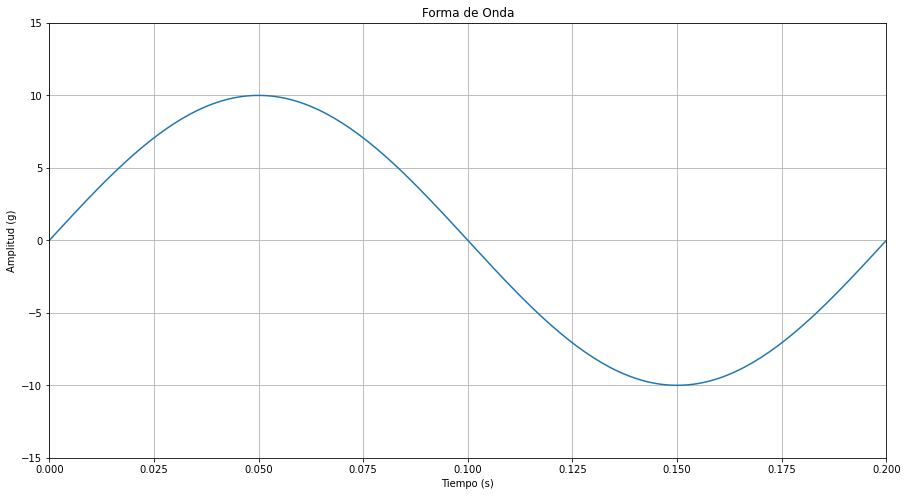

In [12]:
   
    eje_x = dataframe_lector['TIEMPO']
    eje_y = dataframe_lector['AMPLITUD']
    
    
    plt.plot(eje_x,eje_y,label='seno')
    plt.xlim(0,0.2)
    plt.ylim(-15,15)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (g)')
    plt.title('Forma de Onda')
    plt.grid()
    rcParams['figure.figsize'] = 15, 8
    plt.show()
    

**4-** En este caso representaremos el **ESPECTRO DE VIBRACIONES** que una vez realizada la transformada de fourier (en el propio sensor) nos dá información de las amplitudes de cada frecuencia a la que está vibrando la máquina. Información muy importante con la que realizar el análisis del estado de la máquina y sus componentes.

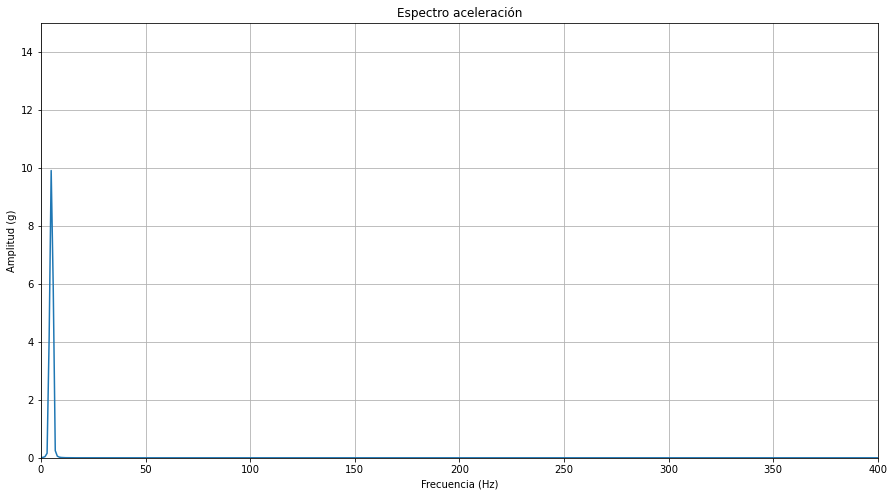

In [13]:

    eje_x = dataframe_lector['FRECUENCIA']
    eje_y = dataframe_lector['AMPLITUD FFT']
    
    plt.plot(eje_x,eje_y,label='seno')
    plt.xlim(0,400)
    plt.ylim(0,15)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (g)')
    plt.title('Espectro aceleración')
    plt.grid()
    rcParams['figure.figsize'] = 16, 8
    plt.show()


**5-** **HISTOGRAMA DE AMPLITUDES** de los valores y su repetitibilidad en la muestra CON MATPLOTLIB.

  

In [29]:
    df = dataframe_lector['AMPLITUD']
    plt.hist(df, bins=20, color='b', rwidth=0.85)
    plt.ylabel("Frecuencia")
    plt.xlabel("Amplitudes")
    plt.title('Histograma de Amplitudes')
    plt.grid()
    rcParams['figure.figsize'] = 16, 8
    plt.show()
    


**6-** **HISTOGRAMA DE AMPLITUDES** de los valores y su repetitibilidad en la muestra CON SEABORN.

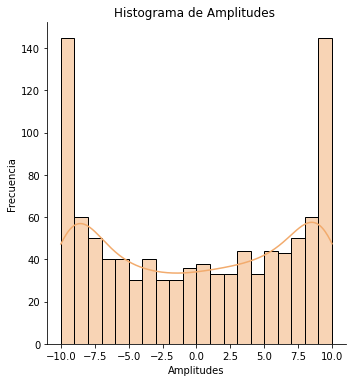

<Figure size 4800x2400 with 0 Axes>

In [37]:
    Serie_Amplitud=np.array(dataframe_lector["AMPLITUD"])

    sb.displot(Serie_Amplitud, color="#F2AB6D", bins=20, kde=True,)
     
    plt.ylabel("Frecuencia")
    plt.xlabel("Amplitudes")
    plt.title("Histograma de Amplitudes ")
    plt.figure(figsize=(16,8,), dpi=300)
    plt.show()
    
   


**7-** Por ultimo, realizaremos varios calculos estadísticos asociados a nuestra muestra. 

In [38]:

    media=dataframe_lector["AMPLITUD"].mean()
    desviacion=dataframe_lector["AMPLITUD"].std()
    mediana = dataframe_lector["AMPLITUD"].median()
    minimo = dataframe_lector["AMPLITUD"].min()
    maximo = dataframe_lector["AMPLITUD"].max()
    
    print('Media: ',media)
    print('Desviación: ',desviacion) 
    print('Mediana',mediana)
    print ("Valor Mínimo:", minimo)
    print ("Valor Máximo:", maximo)

Media:  0.08090052160839849
Desviación:  7.017359055155264
Mediana 0.314107591
Valor Mínimo: -10.0
Valor Máximo: 10.0
